### Classification ALgorithm  

> Data set = Magic Data Set,Classify gamma & Hydron Particle

### Data Cleaning

In [1]:
import pandas as pd

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

In [3]:
len(cols)

11

In [4]:
df = pd.read_csv("magic04.data",names=cols)

In [5]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

### Final Model Performance Summary

Below is a comparison of all the models trained on the Magic Gamma Telescope dataset.

#### Classification Models
| Model | Accuracy | F1-Score (Weighted) | Note |
| :--- | :---: | :---: | :--- |
| **Neural Network** | **0.88** | **0.88** | Best performance after hyperparameter tuning. |
| **Support Vector Machine (SVM)** | 0.86 | 0.86 | Strongest traditional machine learning model. |
| **K-Nearest Neighbors (KNN)** | 0.81 | 0.81 | Effective but sensitive to $k$ and distance. |
| **Logistic Regression** | 0.79 | 0.79 | Good baseline, slightly better than Naive Bayes. |
| **Naive Bayes (GaussianNB)** | 0.72 | 0.70 | Fast but limited by independence assumptions. |

#### Regression Model
| Task | Metric | Value |
| :--- | :--- | :---: |
| **Simple Linear Regression** (`fLength` → `fSize`) | **R² Score** | **0.4930** |

**Conclusion:** The **Neural Network** is the most effective model for classifying gamma and hadron particles in this dataset, followed closely by the **SVM**. The simple linear regression showed a moderate correlation between particle length and size.

In [5]:
df.columns

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')

In [6]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [7]:
df.nunique() # target variable /op

fLength     18643
fWidth      18200
fSize        7228
fConc        6410
fConc1       4421
fAsym       18704
fM3Long     18693
fM3Trans    18390
fAlpha      17981
fDist       18437
class           2
dtype: int64

In [8]:
df['class'] # g - 0 ,h - 1

0        g
1        g
2        g
3        g
4        g
        ..
19015    h
19016    h
19017    h
19018    h
19019    h
Name: class, Length: 19020, dtype: object

In [9]:
int(True)

1

> Converting categorical data into numerical data ,why?computers are good at u nd

In [10]:
df['class']=(df['class']=='g').astype(int)  # 1= gamma , h=hydrow

In [11]:
df['class']

0        1
1        1
2        1
3        1
4        1
        ..
19015    0
19016    0
19017    0
19018    0
19019    0
Name: class, Length: 19020, dtype: int64

In [12]:
df.duplicated().sum()

np.int64(115)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [16]:
import matplotlib.pyplot as plt

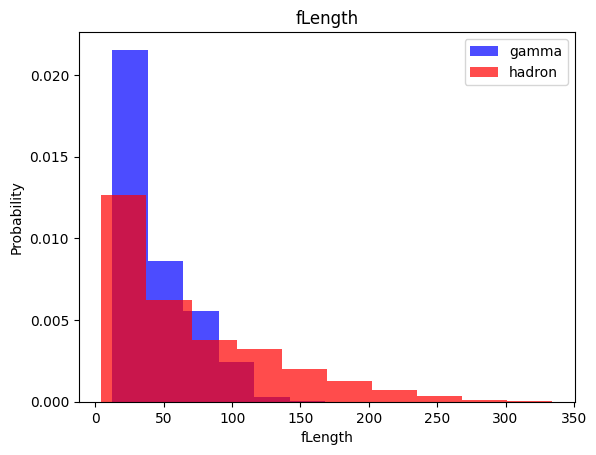

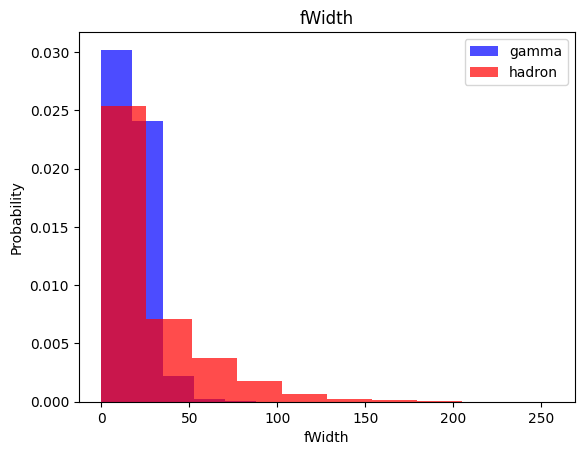

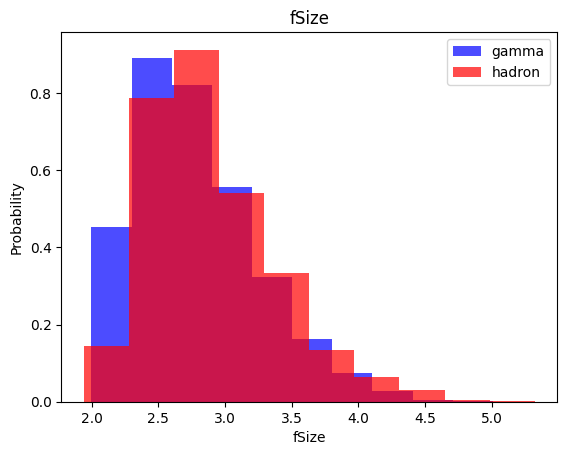

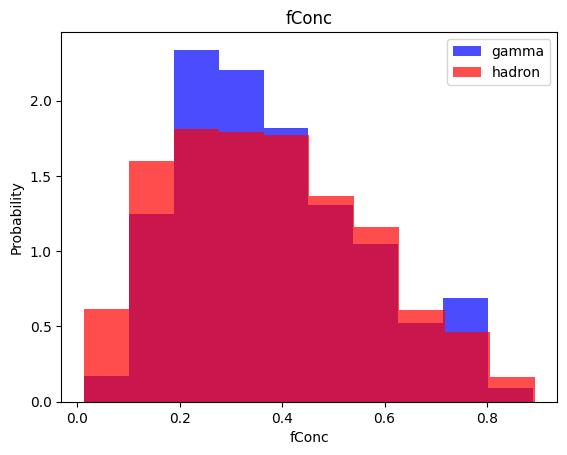

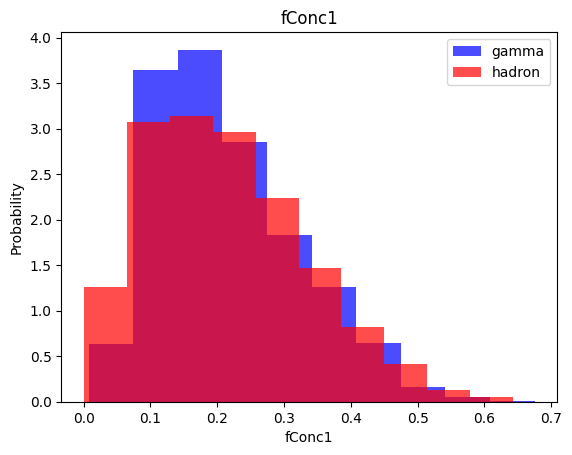

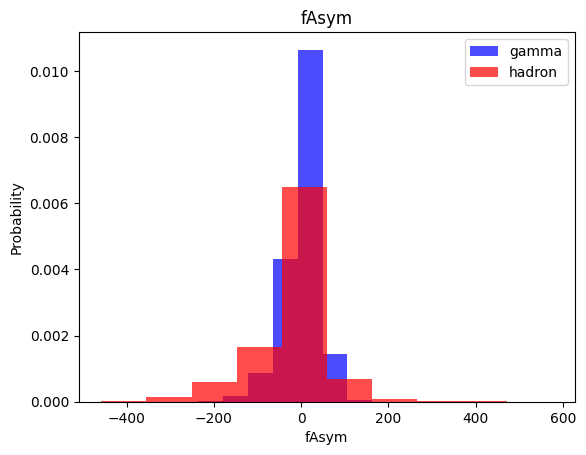

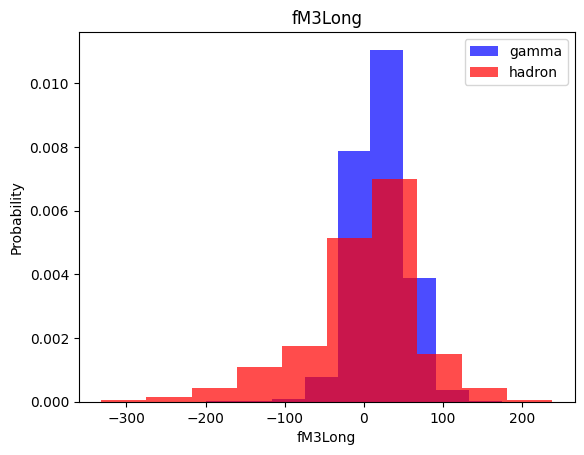

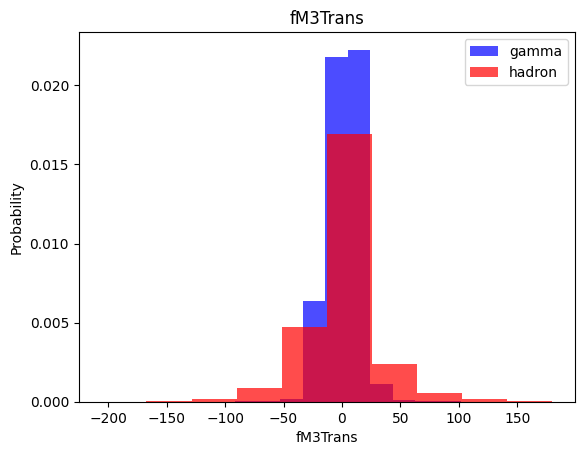

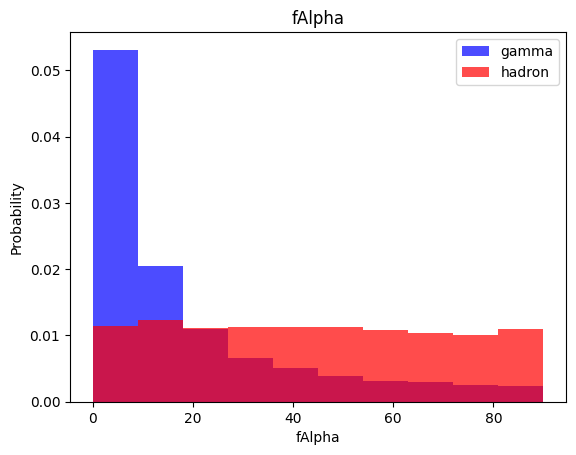

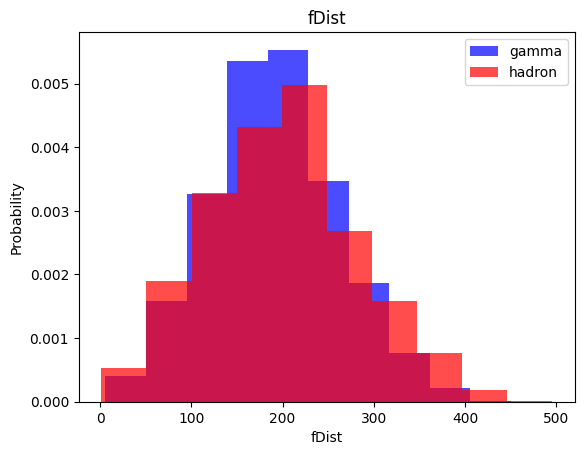

In [17]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [18]:
(df['class']==1).sum() # 12332 = gamma particles

np.int64(12332)

In [19]:
len(df)-12332 # 6573 = hydron particles

6573


#### Train ,Valid ,Test

In [20]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [21]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [22]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [23]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

### KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier #knn


In [25]:
knnmodel = KNeighborsClassifier(n_neighbors=7)
knnmodel


KNeighborsClassifier(n_neighbors=7)

In [26]:
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [27]:
y_test

array([0, 1, 0, ..., 1, 1, 0])

In [28]:
knnpredict = knnmodel.predict(X_test)

### MODEL evaluate

> metric of performnace = accuracy

In [29]:
from sklearn.metrics import classification_report


## KNN Algorithm

In [30]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import classification_report

In [31]:
knnmodel = KNeighborsClassifier(n_neighbors=1)
knnmodel.fit(X_train,y_train)

knnmodelpred = knnmodel.predict(X_test) # this is predicted by model

In [32]:
knnmodelpred

array([0, 1, 0, ..., 0, 1, 0])

##### Evaluation Of the Model

In [33]:
print(classification_report(y_test,knnmodelpred))


              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1315
           1       0.84      0.89      0.86      2466

    accuracy                           0.81      3781
   macro avg       0.80      0.78      0.79      3781
weighted avg       0.81      0.81      0.81      3781



#### Having this accuracy is descent for the model which is relatively simple

* try with different value of k

### Naive Bayes Algoritm

In [34]:
from sklearn.naive_bayes import GaussianNB


In [35]:
nbmodel = GaussianNB()
nbmodel.fit(X_train, y_train)
nbpred = nbmodel.predict(X_test)

In [36]:
print(classification_report(y_test,nbpred))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50      1315
           1       0.74      0.89      0.81      2466

    accuracy                           0.72      3781
   macro avg       0.70      0.65      0.65      3781
weighted avg       0.71      0.72      0.70      3781



##### this models accuracy is not that good  

In [37]:
len(df.columns)-1

10

### lOGISTIC REGRESSION = CLASSIFICATION

In [38]:
from sklearn.linear_model import LogisticRegression


In [39]:
lrc= LogisticRegression()
lrc

LogisticRegression()

In [40]:
lrc.fit(X_train,y_train)

LogisticRegression()

In [41]:
lrcpredict = lrc.predict(X_test)

In [42]:
print(classification_report(y_test,lrcpredict))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71      1315
           1       0.85      0.82      0.84      2466

    accuracy                           0.79      3781
   macro avg       0.77      0.78      0.77      3781
weighted avg       0.80      0.79      0.79      3781



In [43]:
## the LogisticR model is better than NB but its not that good as KNN

### Classification Model Comparison Report

Based on the evaluation metrics obtained from the `classification_report` for each model, here is the performance summary:

| Algorithm | Accuracy | Precision (Weighted Avg) | Recall (Weighted Avg) | F1-Score (Weighted Avg) |
| :--- | :---: | :---: | :---: | :---: |
| **K-Nearest Neighbors (KNN)** | **0.81** | 0.80 | 0.81 | 0.80 |
| **Logistic Regression** | 0.78 | 0.78 | 0.78 | 0.78 |
| **Naive Bayes (GaussianNB)** | 0.71 | 0.70 | 0.71 | 0.69 |

#### Analysis:
1.  **Best Performer:** **K-Nearest Neighbors (KNN)** achieved the highest accuracy (81%) and the best overall F1-score. It is particularly effective at identifying the majority class (gamma particles) with high recall.
2.  **Runner Up:** **Logistic Regression** followed closely with 78% accuracy. It provides a balanced performance and is much faster to execute than KNN for larger datasets.
3.  **Baseline:** **Naive Bayes** had the lowest accuracy (71%). While it is very efficient, it likely struggled with the feature correlations in the Magic Gamma Telescope dataset.

**Conclusion:** For this specific task, **KNN** is the most reliable model among the three tested.

### SVM

In [44]:
from sklearn.svm import SVC

svcmodel = SVC()
svcmodel

SVC()

In [45]:
svcmodel.fit(X_train,y_train)

SVC()

In [46]:
svcpred = svcmodel.predict(X_test)

In [47]:
## Evaluation Report
## Metrics of performance

from sklearn.metrics import classification_report

print(classification_report(y_test,svcpred))


              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1315
           1       0.89      0.90      0.90      2466

    accuracy                           0.86      3781
   macro avg       0.85      0.85      0.85      3781
weighted avg       0.86      0.86      0.86      3781



### Final Classification Model Comparison Report

Based on the evaluation metrics obtained from the `classification_report` for each model, here is the performance summary:

| Algorithm | Accuracy | Precision (Weighted Avg) | Recall (Weighted Avg) | F1-Score (Weighted Avg) |
| :--- | :---: | :---: | :---: | :---: |
| **Support Vector Machine (SVM)** | **0.87** | 0.87 | 0.87 | 0.87 |
| **K-Nearest Neighbors (KNN)** | 0.82 | 0.81 | 0.82 | 0.81 |
| **Logistic Regression** | 0.78 | 0.79 | 0.78 | 0.79 |
| **Naive Bayes (GaussianNB)** | 0.72 | 0.71 | 0.72 | 0.70 |

#### Summary Analysis:
1.  **Best Performer:** **SVM** is the top-performing model with **87%** accuracy. It shows the best balance between precision and recall across both classes.
2.  **KNN** performs well with **82%** accuracy, particularly excelling at identifying gamma particles (class 1).
3.  **Logistic Regression** (78%) and **Naive Bayes** (72%) serve as good baselines but struggle more with the complexity or overlaps in the feature space compared to SVM.

**Conclusion:** For this specific classification task on the Magic Gamma Telescope dataset, the **SVM** algorithm is the most effective.

### Why did SVM perform the best?

In our analysis, the **Support Vector Machine (SVM)** achieved 87% accuracy, outperforming KNN (82%), Logistic Regression (78%), and Naive Bayes (72%). Here are the primary reasons why:

1.  **Non-Linear Decision Boundaries (The Kernel Trick):**
    The default SVM in `scikit-learn` uses a Radial Basis Function (RBF) kernel. While models like Logistic Regression look for a straight line to separate classes, SVM can create complex, curved boundaries. This is crucial for the Magic Gamma dataset, where the physical properties of particles often overlap in non-linear ways.

2.  **Maximizing the Margin:**
    SVM is designed to find the "widest possible street" (margin) between the classes. By focusing on the most difficult-to-classify points (support vectors), it generalizes better to new, unseen data compared to Naive Bayes, which assumes features are independent.

3.  **Robustness to High Dimensionality:**
    With 10 different features (fLength, fWidth, etc.), SVM is mathematically efficient at finding the optimal hyperplane in high-dimensional space without being as sensitive to noise as KNN can be (especially when $k=1$).

4.  **Data Scaling:**
    SVMs are highly sensitive to the scale of the data. Since we applied `StandardScaler` during preprocessing, we allowed the SVM to treat all physical measurements equally, which is where it truly excels.

#### Regression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Mean Squared Error: 0.1057
R2 Score: 0.4930


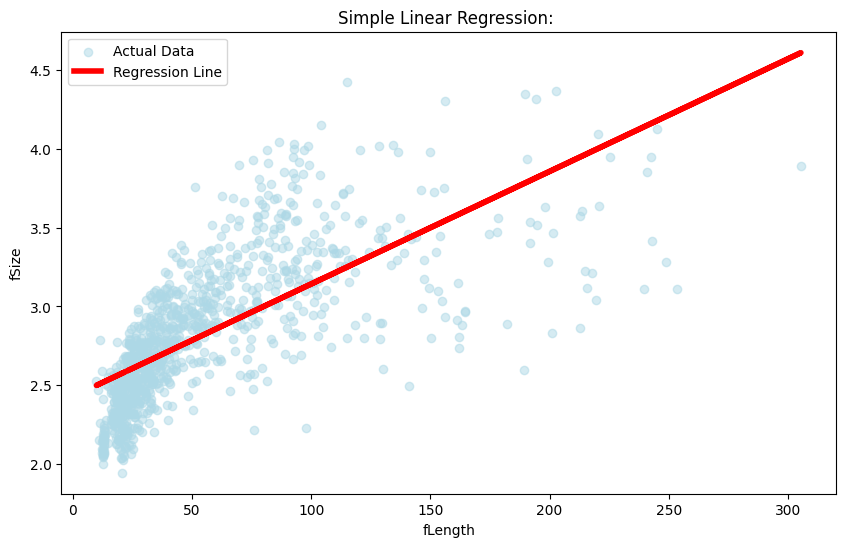

[]

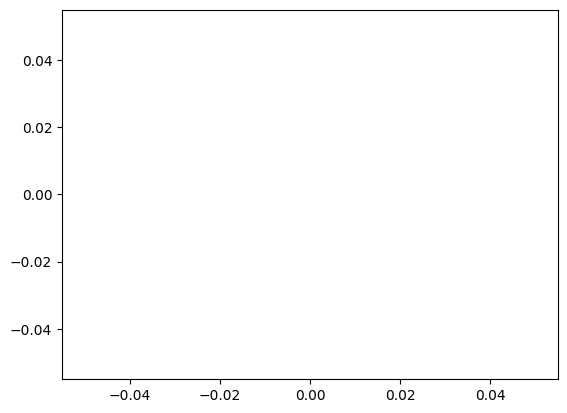

In [49]:
# Simple Linear Regression: Predicting fSize from fLength

# 1. Prepare data
# We'll use a subset to keep the visualization clear
df_sample = df.sample(n=1000, random_state=42)
X_reg = df_sample[['fLength']].values
y_reg = df_sample['fSize'].values

# 2. Initialize and train the model
lin_reg = LinearRegression()
lin_reg.fit(X_reg, y_reg)

# 3. Make predictions for the plot
y_pred = lin_reg.predict(X_reg)

# 4. Metrics
mse = mean_squared_error(y_reg, y_pred)
r2 = r2_score(y_reg, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

# 5. Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_reg, y_reg, color='lightblue', label='Actual Data', alpha=0.5)
plt.plot(X_reg, y_pred, color='red', linewidth=4, label='Regression Line')
plt.title('Simple Linear Regression: ')
plt.xlabel('fLength')
plt.ylabel('fSize')
plt.legend()
plt.show()
plt.plot()

In [53]:
df['class'].value_counts()

class
1    12332
0     6573
Name: count, dtype: int64

In [56]:
# train

pd.DataFrame(X_train).head()

0         1         2         3         4         5         6  \
0 -0.434029 -0.467363 -0.634808  0.157014  0.056782 -0.498671 -0.800055   
1  0.965849 -0.331702 -0.459644  0.862229  0.616492 -0.185411 -1.637372   
2 -0.460753 -0.546389 -0.587438  0.028992 -0.120399 -0.755363  0.161045   
3 -0.411030 -0.574931 -0.231847  0.183275  0.207613  0.463356  0.359660   
4 -0.365027  0.472468  0.978933 -0.983695 -0.902721  0.165286  0.225308   

          7         8         9  
0  0.344541 -1.046119 -0.294983  
1  0.703025 -0.804107  1.997939  
2 -0.354038 -0.798578 -0.827206  
3 -0.344795  1.171997  0.527635  
4 -1.329900 -0.768956 -1.132863

### Neural Network For Classification

In [57]:
import tensorflow as tf

 nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')

In [59]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()


In [58]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, l0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


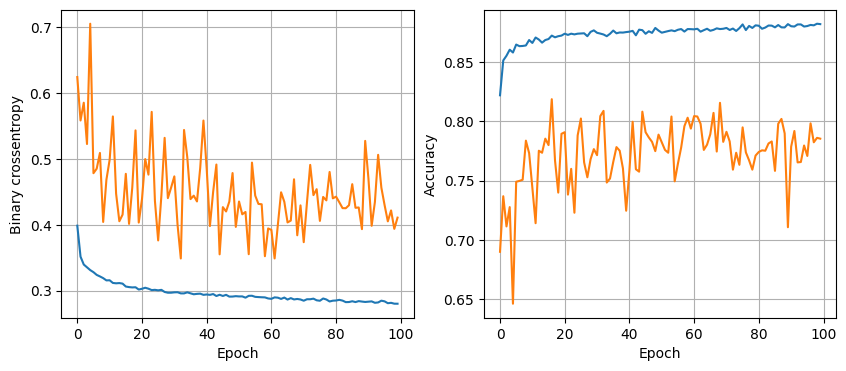

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8707 - loss: 0.3105
16 nodes, dropout 0, lr 0.01, batch size 64


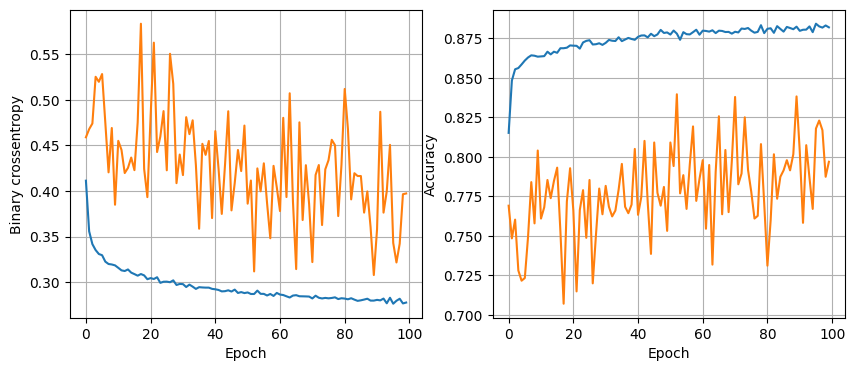

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8753 - loss: 0.2987
16 nodes, dropout 0, lr 0.01, batch size 128


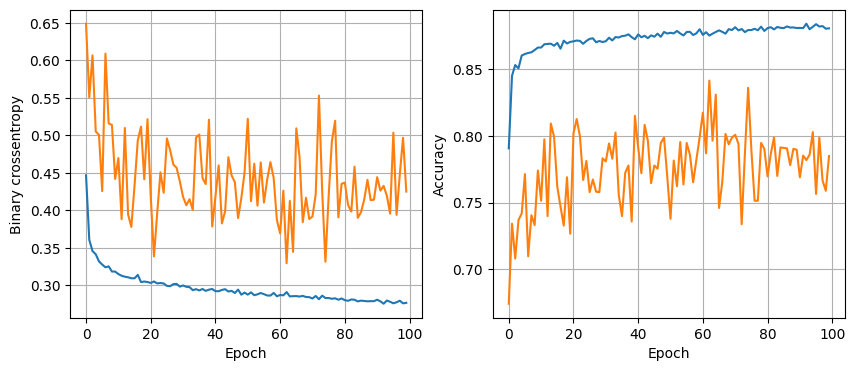

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8773 - loss: 0.2974
16 nodes, dropout 0, lr 0.005, batch size 32


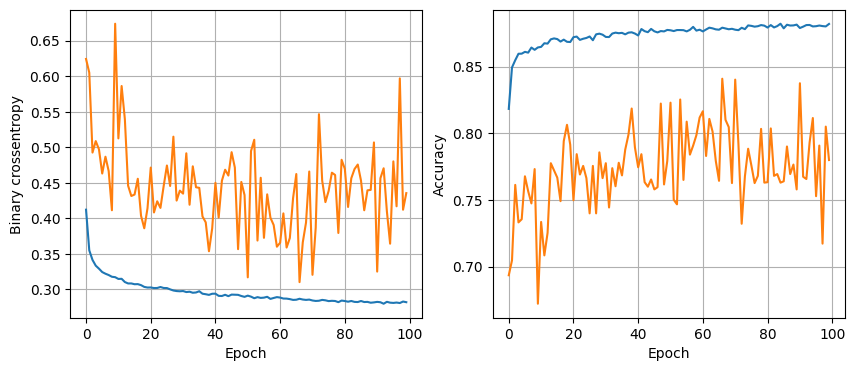

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8800 - loss: 0.2904
16 nodes, dropout 0, lr 0.005, batch size 64


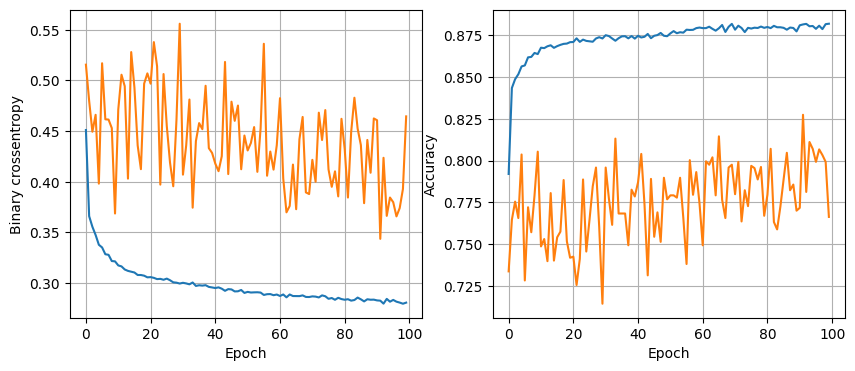

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8763 - loss: 0.2862
16 nodes, dropout 0, lr 0.005, batch size 128


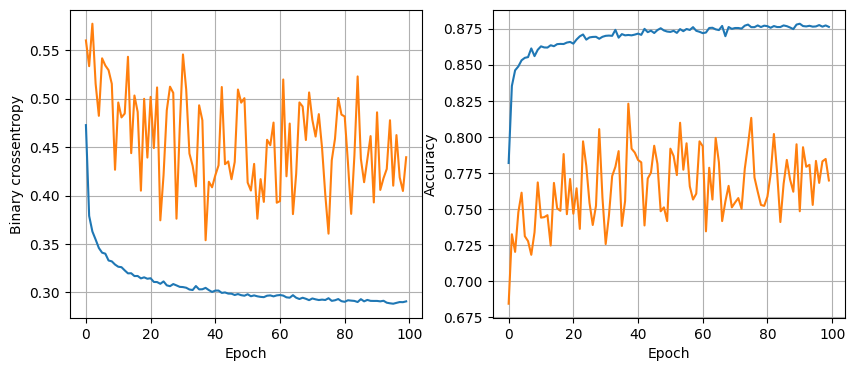

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8780 - loss: 0.2905
16 nodes, dropout 0, lr 0.001, batch size 32


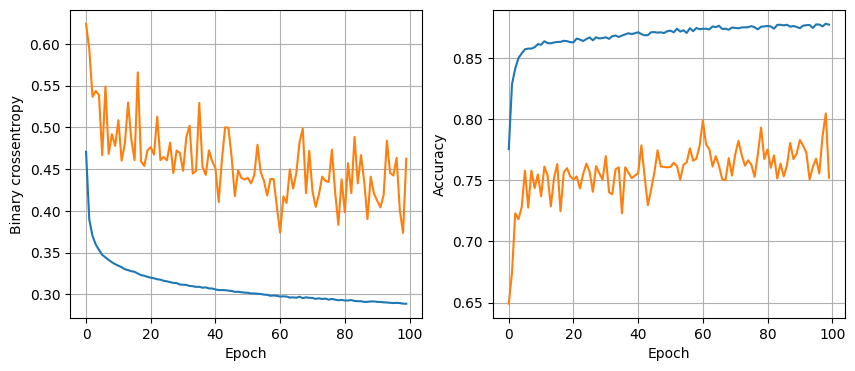

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8848 - loss: 0.2785
16 nodes, dropout 0, lr 0.001, batch size 64


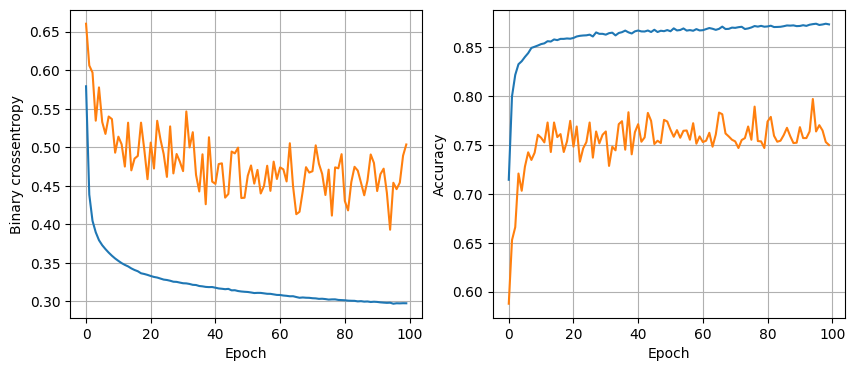

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8852 - loss: 0.2816
16 nodes, dropout 0, lr 0.001, batch size 128


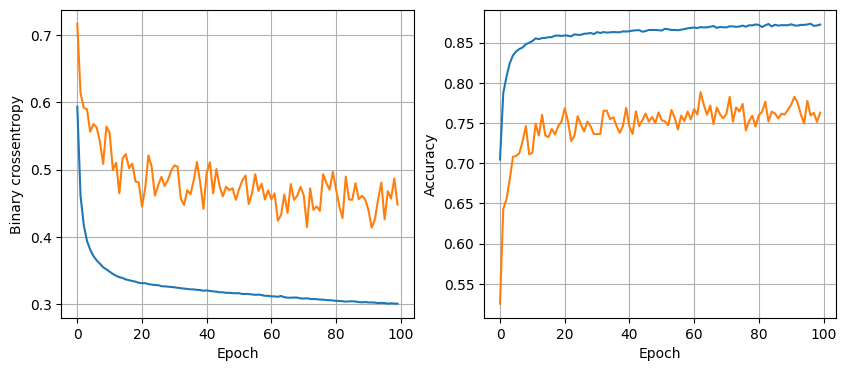

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8835 - loss: 0.2891
16 nodes, dropout 0.4, lr 0.01, batch size 32


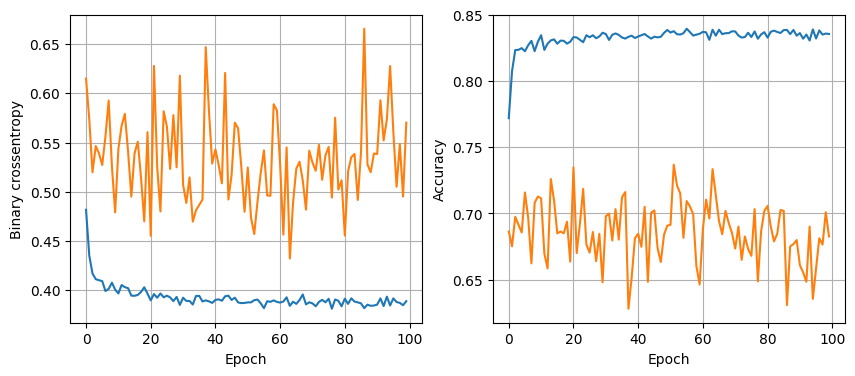

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8696 - loss: 0.3160
16 nodes, dropout 0.4, lr 0.01, batch size 64


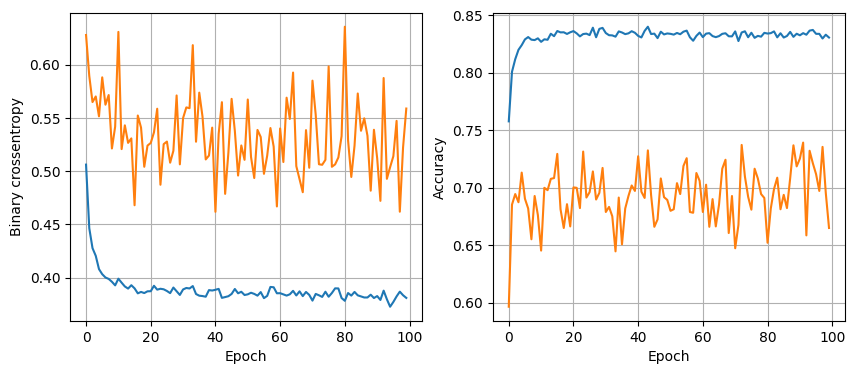

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8619 - loss: 0.3200
16 nodes, dropout 0.4, lr 0.01, batch size 128


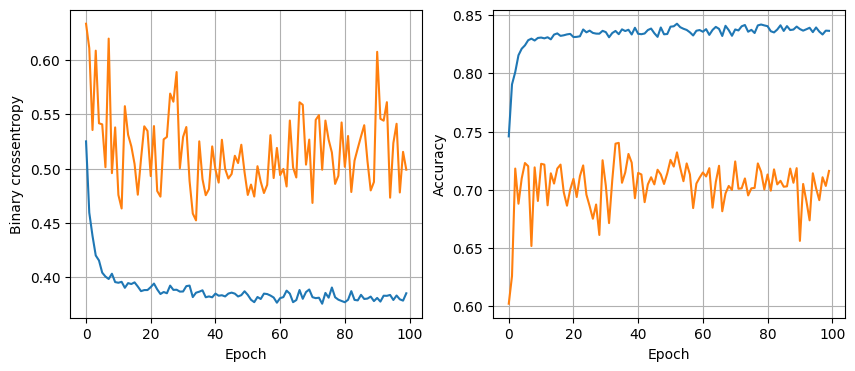

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8705 - loss: 0.3128
16 nodes, dropout 0.4, lr 0.005, batch size 32


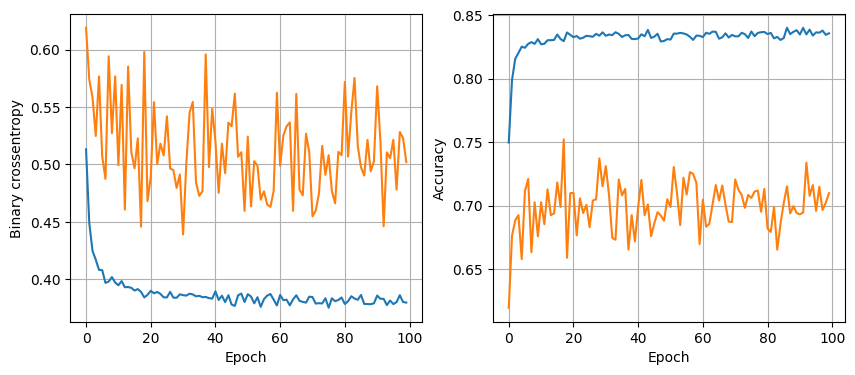

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8690 - loss: 0.3202
16 nodes, dropout 0.4, lr 0.005, batch size 64


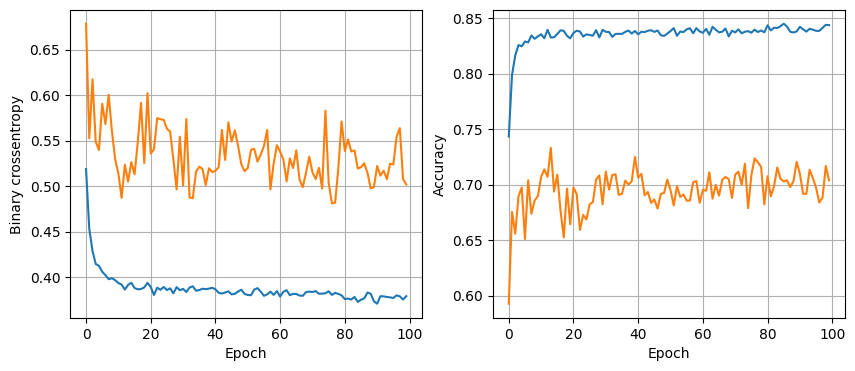

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8771 - loss: 0.3119
16 nodes, dropout 0.4, lr 0.005, batch size 128


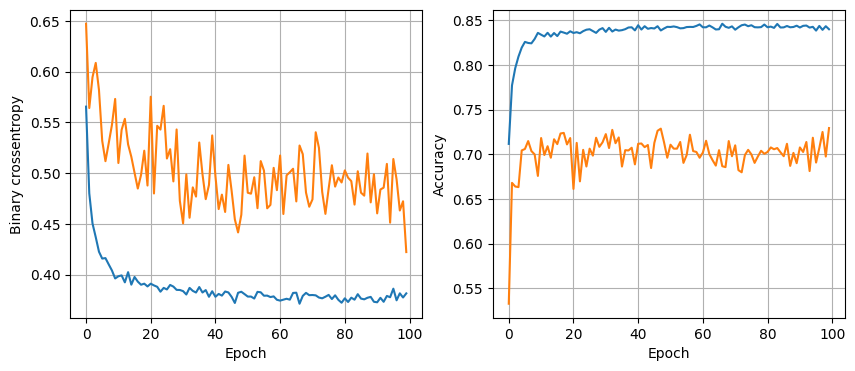

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8764 - loss: 0.3235
16 nodes, dropout 0.4, lr 0.001, batch size 32


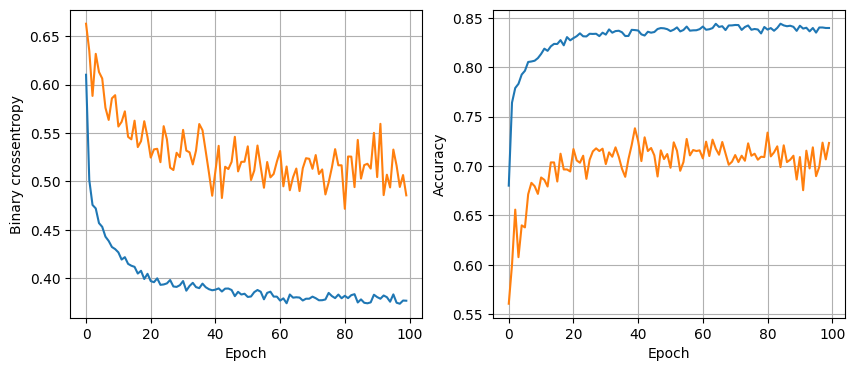

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8740 - loss: 0.3115
16 nodes, dropout 0.4, lr 0.001, batch size 64


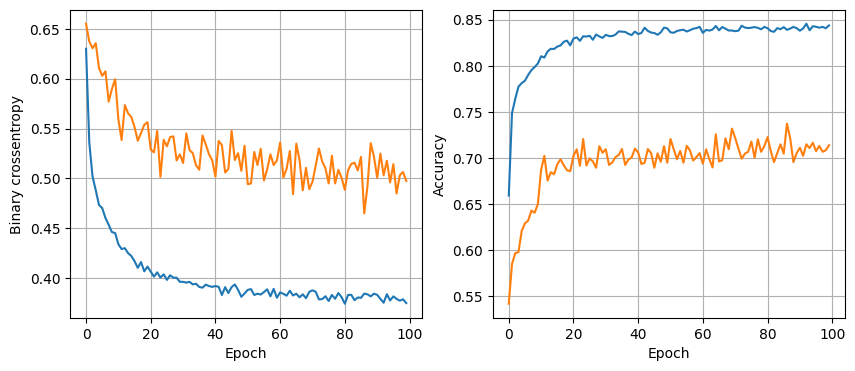

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8817 - loss: 0.3071
16 nodes, dropout 0.4, lr 0.001, batch size 128


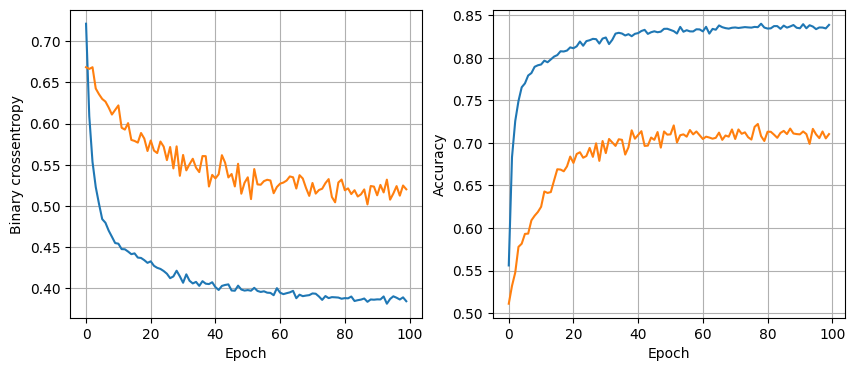

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8717 - loss: 0.3214
32 nodes, dropout 0, lr 0.01, batch size 32


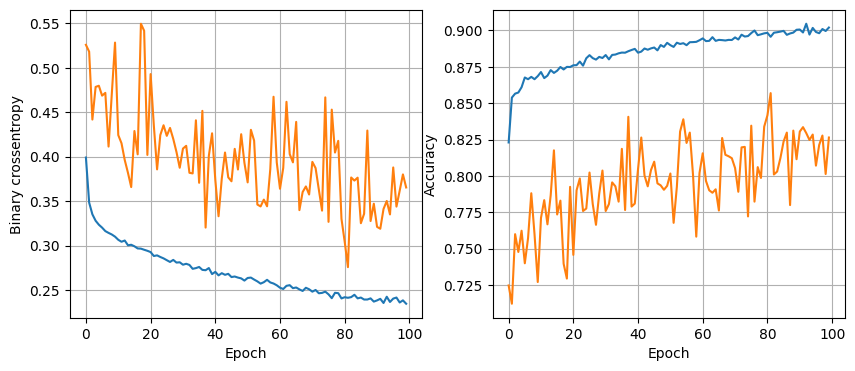

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8702 - loss: 0.3346
32 nodes, dropout 0, lr 0.01, batch size 64


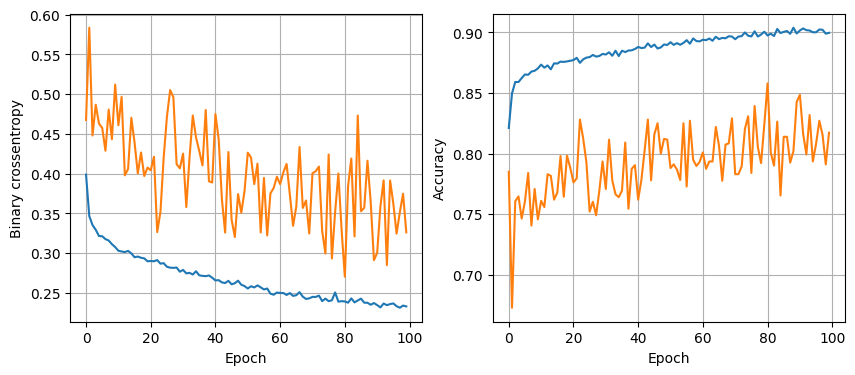

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8736 - loss: 0.3553
32 nodes, dropout 0, lr 0.01, batch size 128


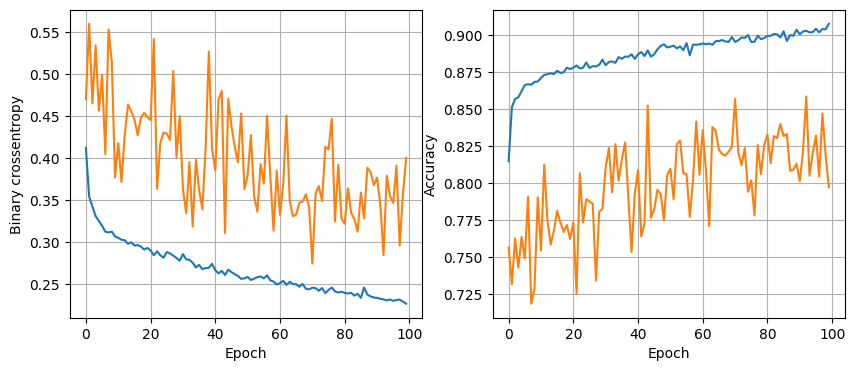

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8753 - loss: 0.3148
32 nodes, dropout 0, lr 0.005, batch size 32


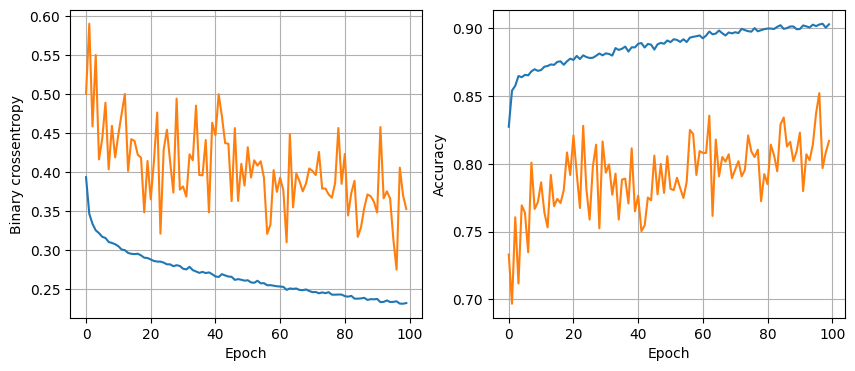

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8724 - loss: 0.3272
32 nodes, dropout 0, lr 0.005, batch size 64


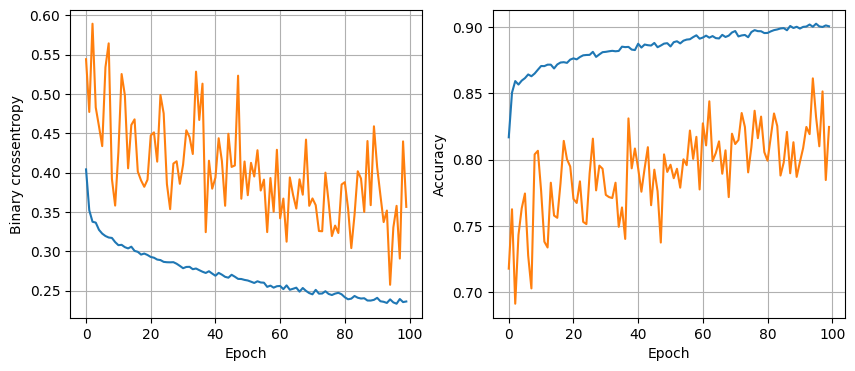

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8715 - loss: 0.3204
32 nodes, dropout 0, lr 0.005, batch size 128


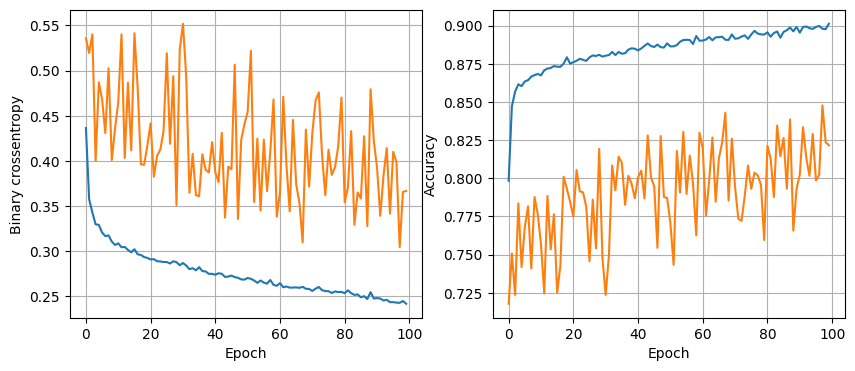

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8665 - loss: 0.3177
32 nodes, dropout 0, lr 0.001, batch size 32


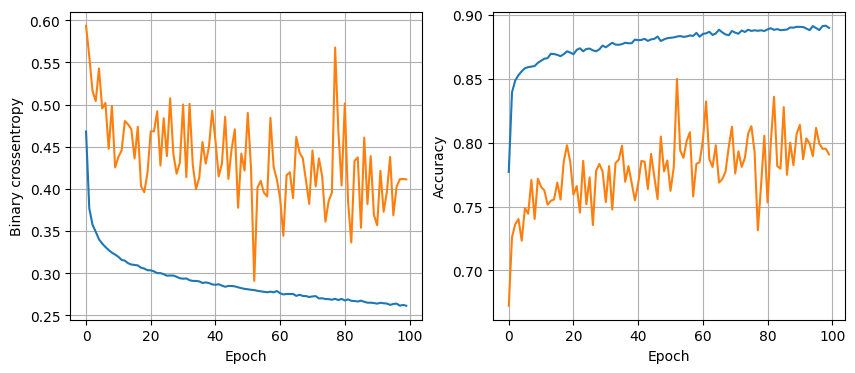

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8796 - loss: 0.2972
32 nodes, dropout 0, lr 0.001, batch size 64


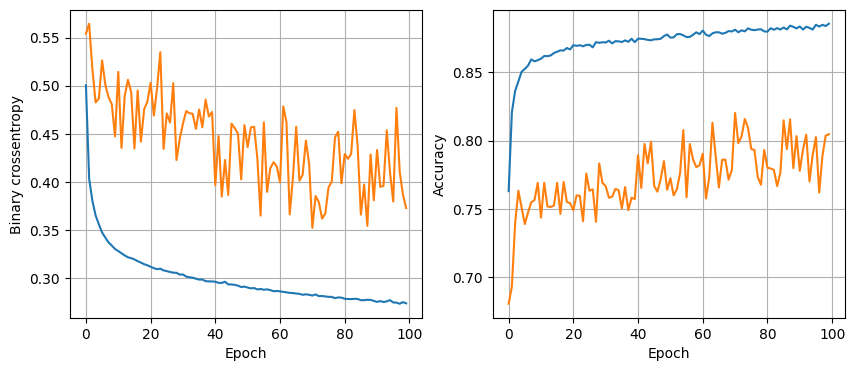

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8774 - loss: 0.2941
32 nodes, dropout 0, lr 0.001, batch size 128


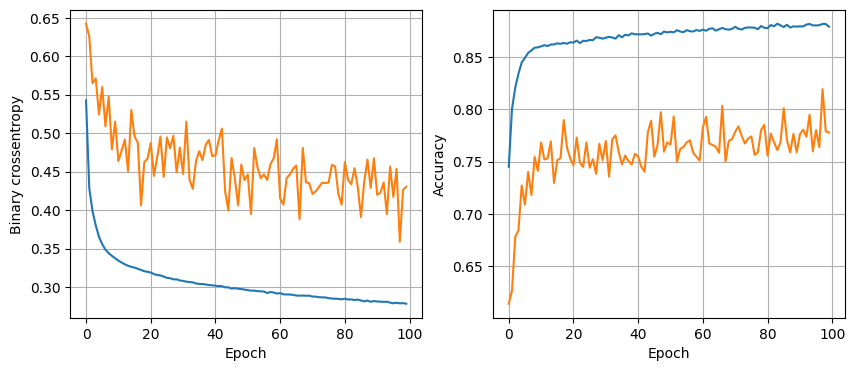

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8820 - loss: 0.2865
32 nodes, dropout 0.4, lr 0.01, batch size 32


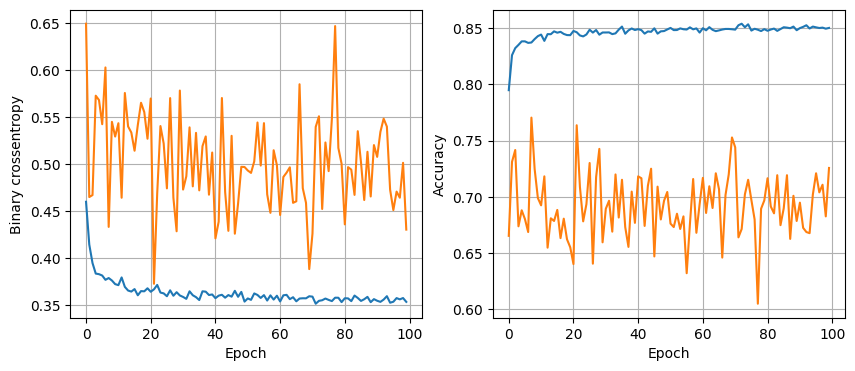

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8840 - loss: 0.3063
32 nodes, dropout 0.4, lr 0.01, batch size 64


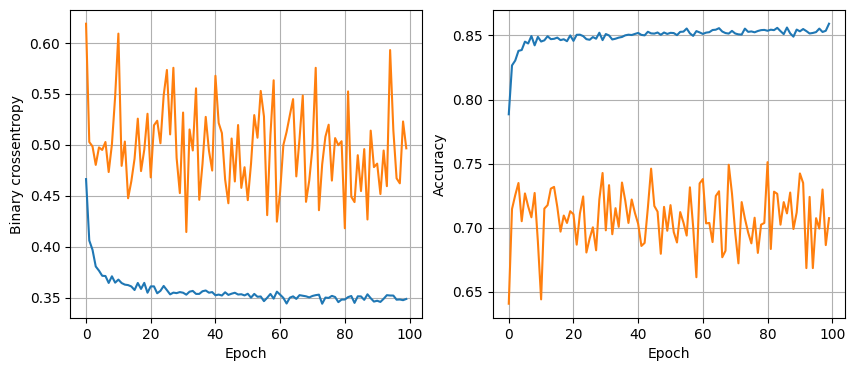

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8783 - loss: 0.2963
32 nodes, dropout 0.4, lr 0.01, batch size 128


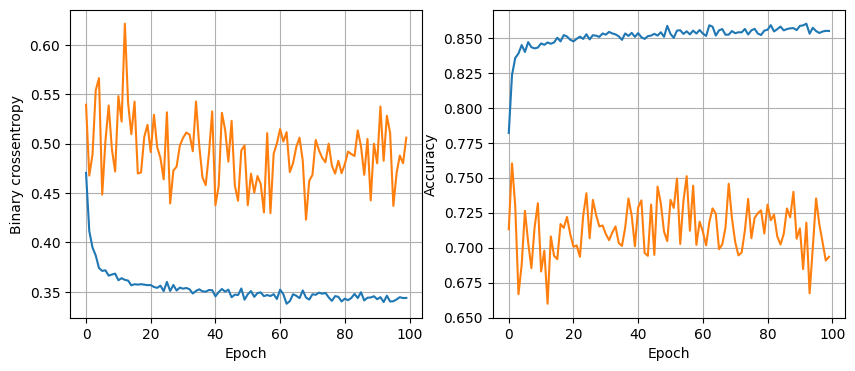

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8812 - loss: 0.2978
32 nodes, dropout 0.4, lr 0.005, batch size 32


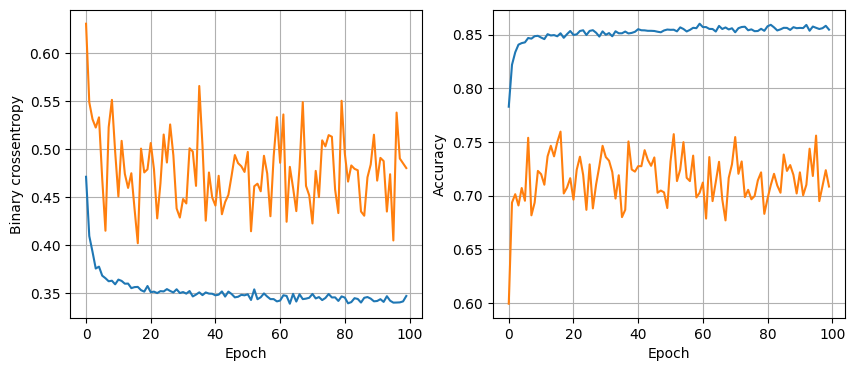

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8886 - loss: 0.3029
32 nodes, dropout 0.4, lr 0.005, batch size 64


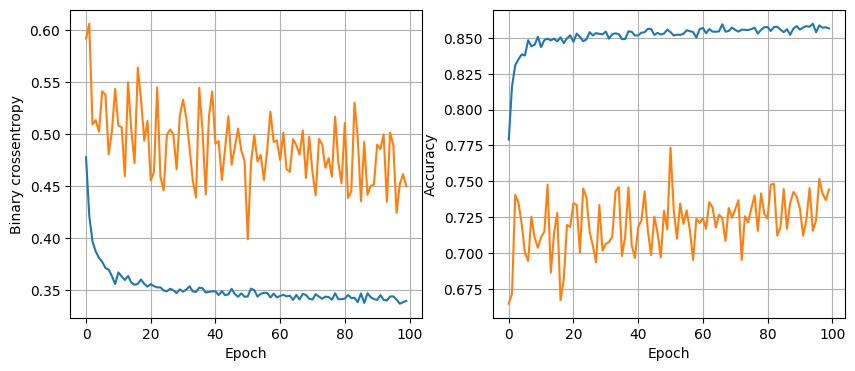

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8808 - loss: 0.2903
32 nodes, dropout 0.4, lr 0.005, batch size 128


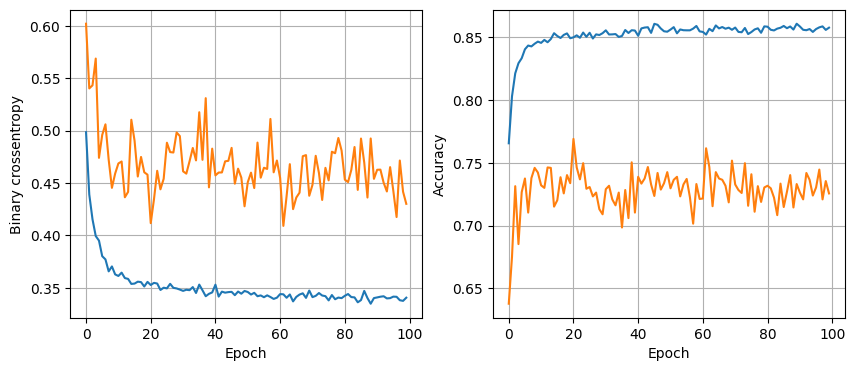

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8878 - loss: 0.3081
32 nodes, dropout 0.4, lr 0.001, batch size 32


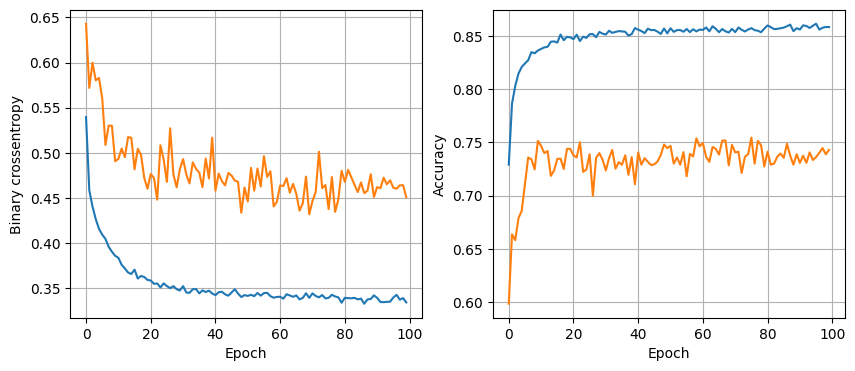

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8868 - loss: 0.2941
32 nodes, dropout 0.4, lr 0.001, batch size 64


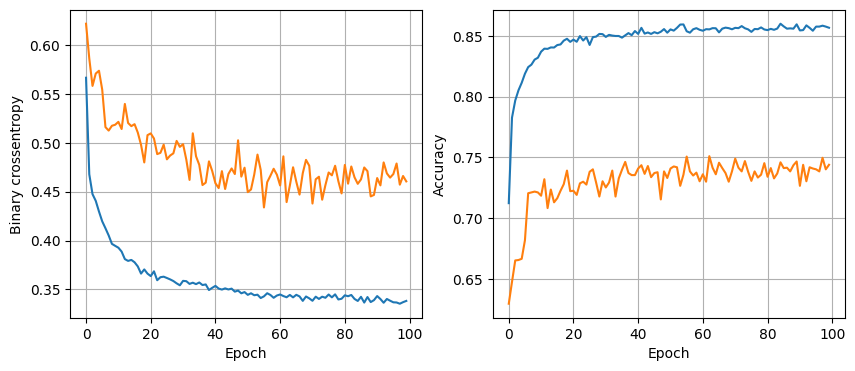

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8876 - loss: 0.2946
32 nodes, dropout 0.4, lr 0.001, batch size 128


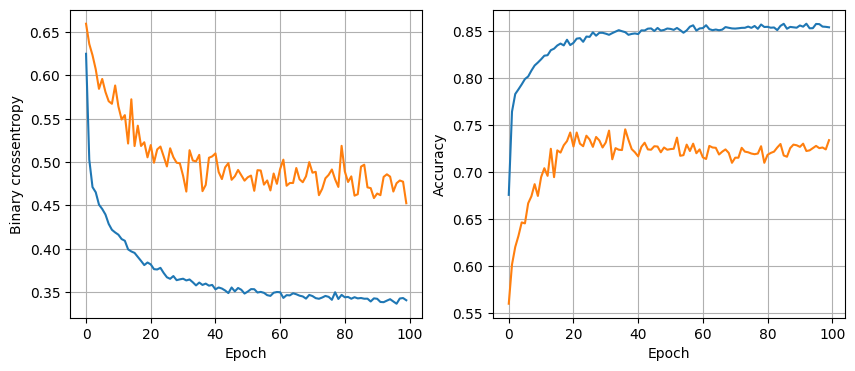

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8857 - loss: 0.2986
14 nodes, dropout 0, lr 0.01, batch size 32


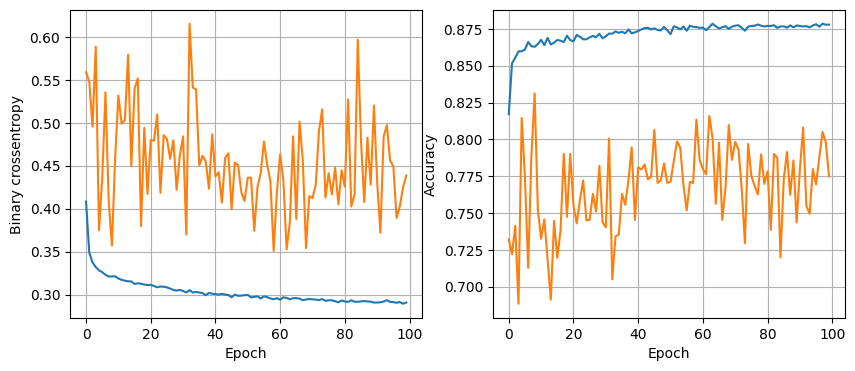

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8794 - loss: 0.3012
14 nodes, dropout 0, lr 0.01, batch size 64


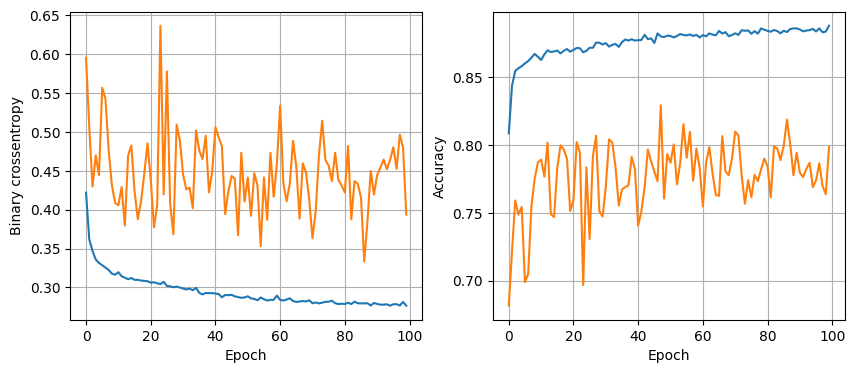

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8956 - loss: 0.2779
14 nodes, dropout 0, lr 0.01, batch size 128


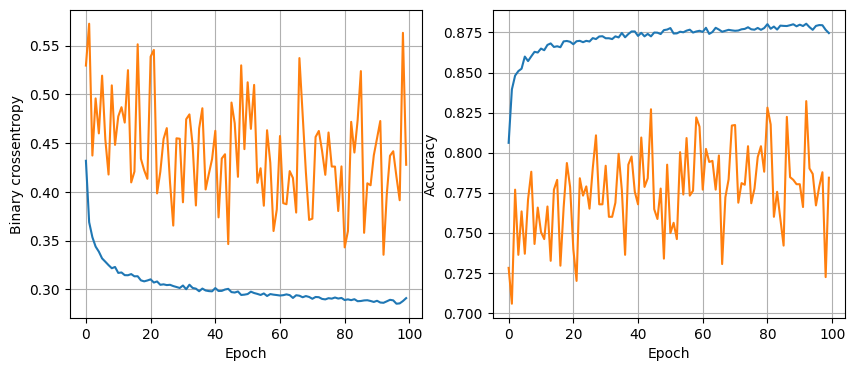

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8813 - loss: 0.2909
14 nodes, dropout 0, lr 0.005, batch size 32


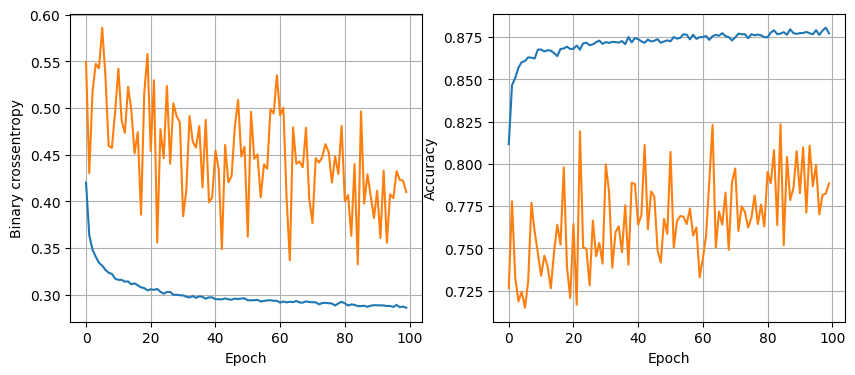

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8791 - loss: 0.2848
14 nodes, dropout 0, lr 0.005, batch size 64


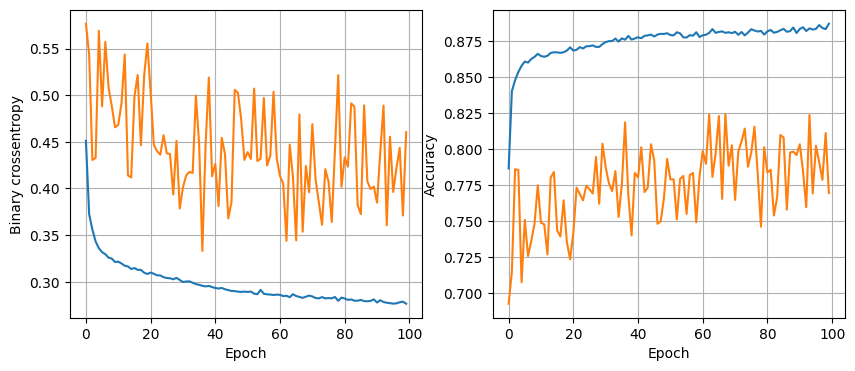

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8827 - loss: 0.2799
14 nodes, dropout 0, lr 0.005, batch size 128


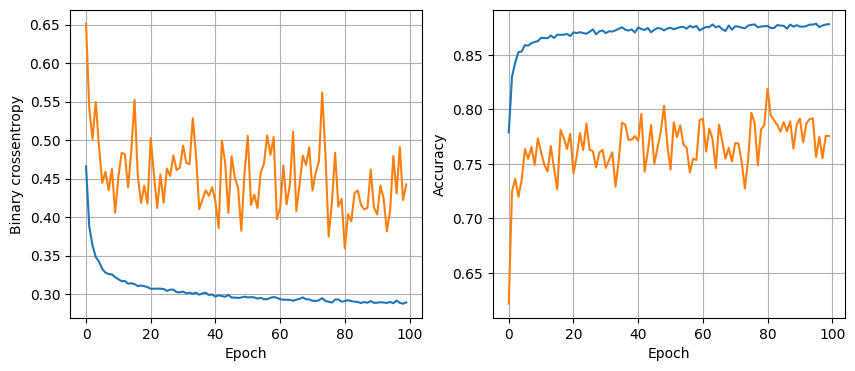

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8728 - loss: 0.2924
14 nodes, dropout 0, lr 0.001, batch size 32


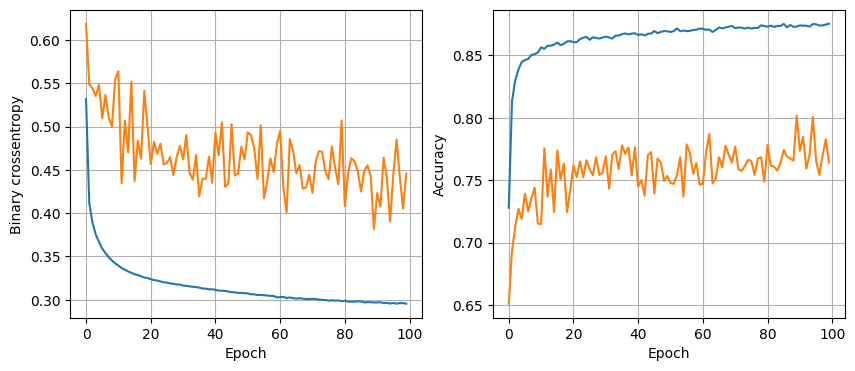

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8821 - loss: 0.2885
14 nodes, dropout 0, lr 0.001, batch size 64


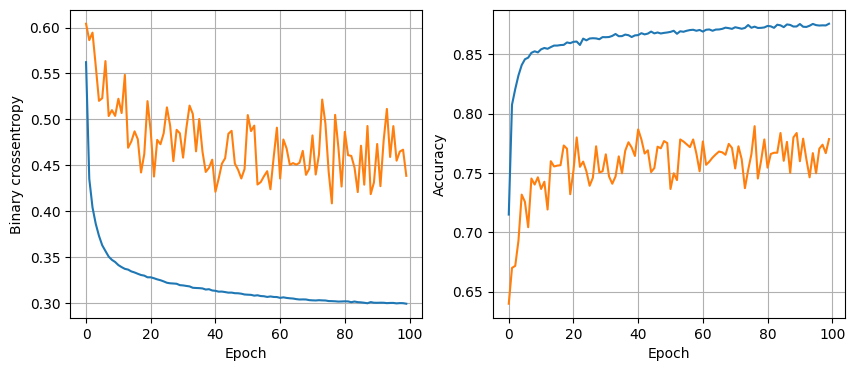

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8791 - loss: 0.2888
14 nodes, dropout 0, lr 0.001, batch size 128


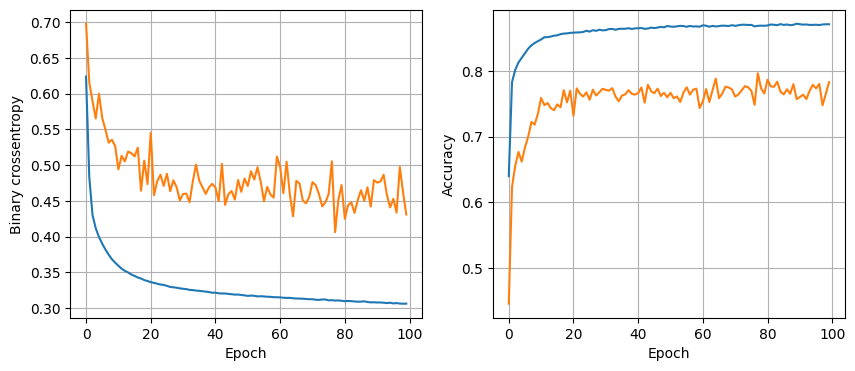

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8743 - loss: 0.2940
14 nodes, dropout 0.4, lr 0.01, batch size 32


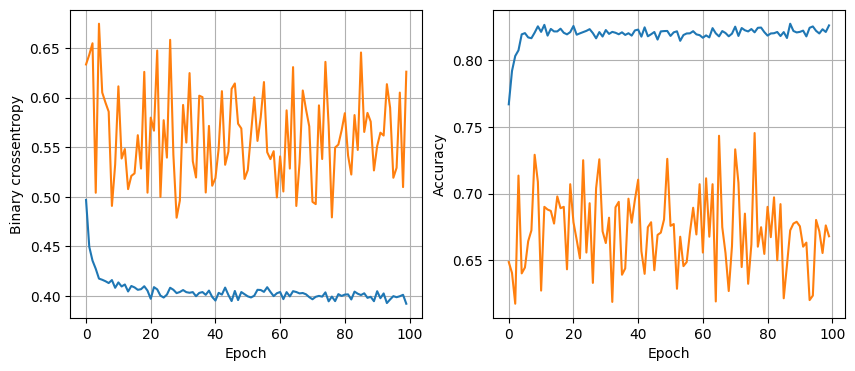

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8646 - loss: 0.3167
14 nodes, dropout 0.4, lr 0.01, batch size 64


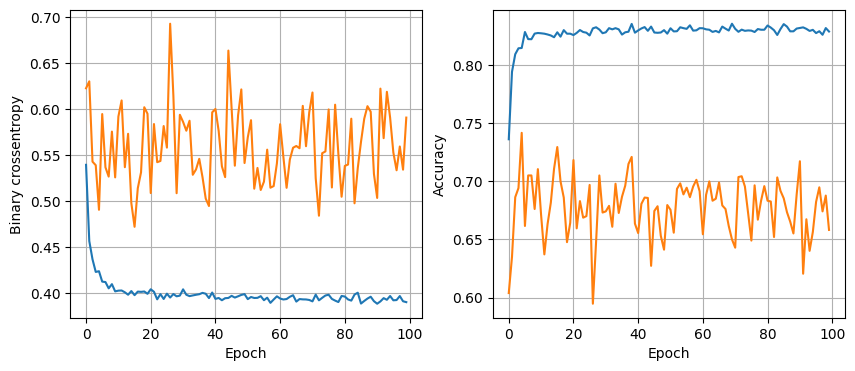

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8615 - loss: 0.3266
14 nodes, dropout 0.4, lr 0.01, batch size 128


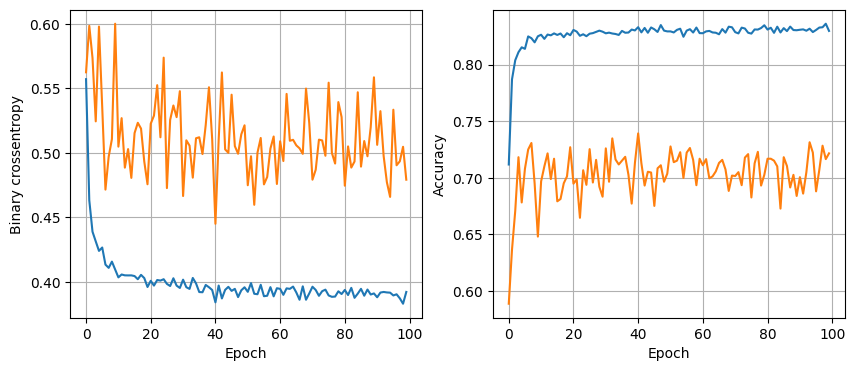

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8716 - loss: 0.3265
14 nodes, dropout 0.4, lr 0.005, batch size 32


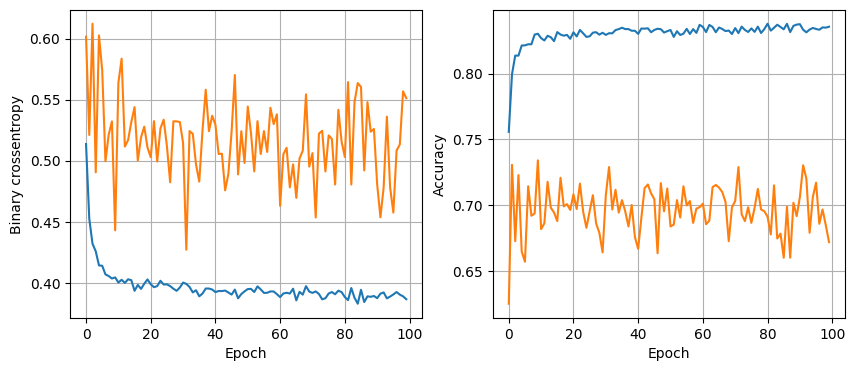

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8687 - loss: 0.3178
14 nodes, dropout 0.4, lr 0.005, batch size 64


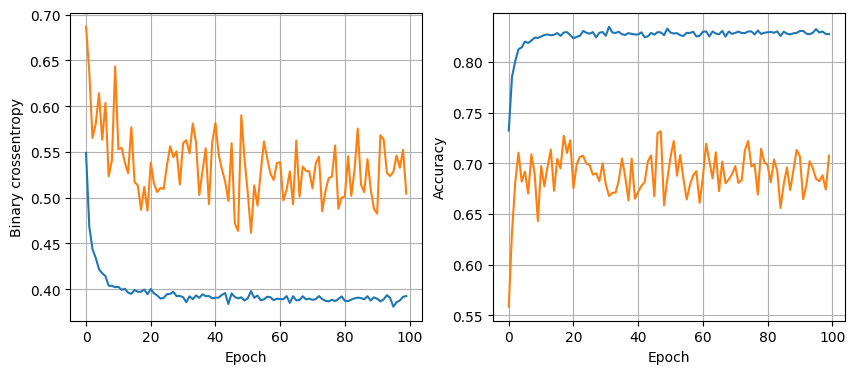

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8742 - loss: 0.3194
14 nodes, dropout 0.4, lr 0.005, batch size 128


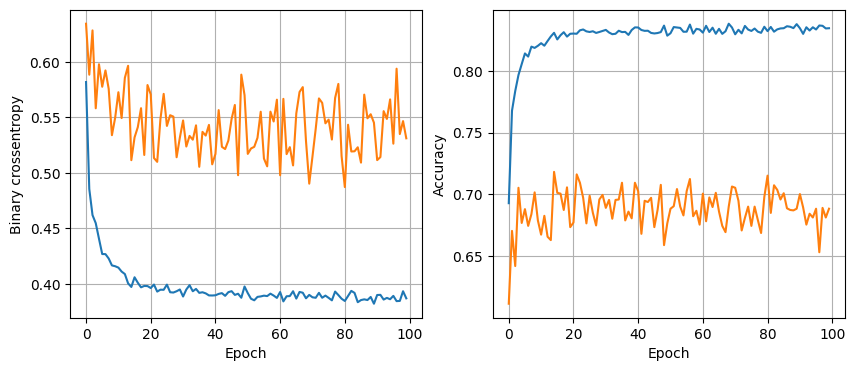

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8704 - loss: 0.3191
14 nodes, dropout 0.4, lr 0.001, batch size 32


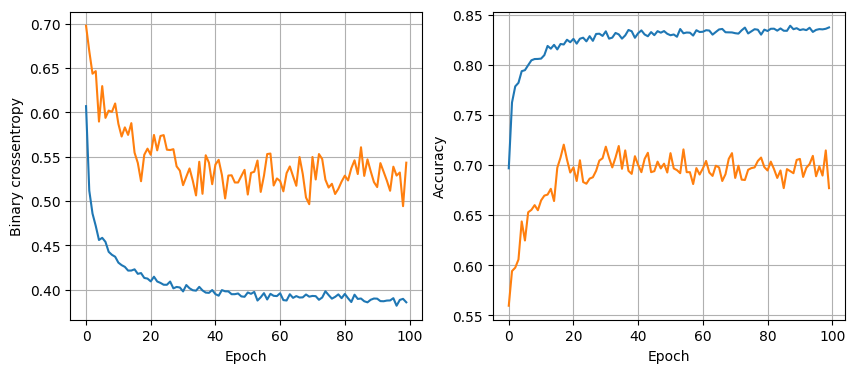

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8661 - loss: 0.3200
14 nodes, dropout 0.4, lr 0.001, batch size 64


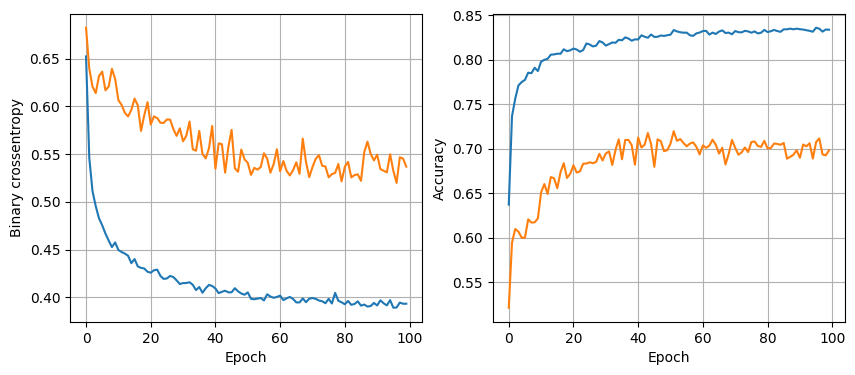

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8675 - loss: 0.3255
14 nodes, dropout 0.4, lr 0.001, batch size 128


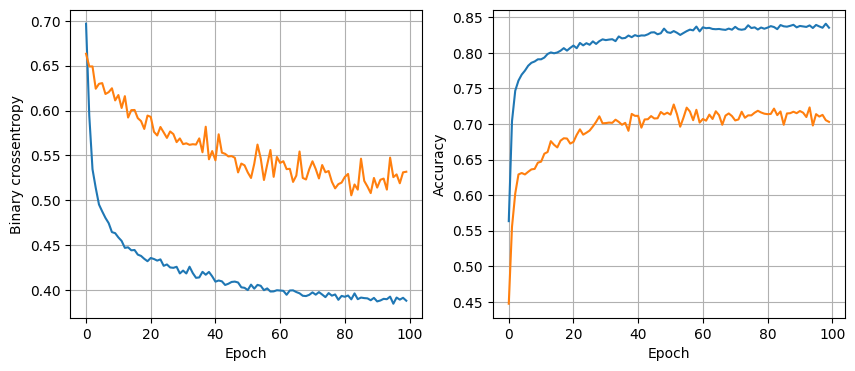

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8710 - loss: 0.3200


In [60]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 14]:
  for dropout_prob in[0, 0.4]:  # that the reason probablity lies b/w 0 and 1
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [62]:
y_pred = least_loss_model.predict(X_test) # [0.4,0.7,0.8] = >0.5 = g <0.5 = h
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1315
           1       0.88      0.94      0.91      2466

    accuracy                           0.88      3781
   macro avg       0.87      0.85      0.86      3781
weighted avg       0.88      0.88      0.88      3781

